In [2]:
'''
This part of code is a refer from axida to uniform the map plot pattern
This code would not work under this directory
'''
import geopandas 
import geoplot
from shapely import wkt
import pandas as pd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lot_nums = pd.read_parquet('/Volumes/恢复/732实验/project/up_down_stat/new_output/DO_total.parquet')
#lot_nums

In [3]:
taxi_zone = pd.read_csv('/Volumes/恢复/732实验/project/parking_lot_etl/processed_data/taxi_zones.csv')
#taxi_zone

In [4]:
for i in range(len(lot_nums)):
    for j in range(len(taxi_zone)):
        if(taxi_zone.loc[j]['LocationID'] == lot_nums.loc[i]['DOLocationID']):
            lot_nums.loc[i,'geometry'] = taxi_zone.loc[j]['the_geom']

In [5]:
lot_nums = lot_nums.dropna()
lot_nums.loc[:,'geometry'] = geopandas.GeoSeries.from_wkt(lot_nums['geometry'])
lot_nums['log_amount'] = np.log(lot_nums['DOID_count'])
lot_nums = geopandas.GeoDataFrame(lot_nums)

/var/folders/5d/l4sfyr5971b5h3mqtv8xywgr0000gn/T/ipykernel_23210/1548625874.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  lot_nums.loc[:,'geometry'] = geopandas.GeoSeries.from_wkt(lot_nums['geometry'])


In [7]:
lot_nums

,DOLocationID,DOID_count,geometry,log_amount
0,236,14387257,"MULTIPOLYGON (((-73.95779 40.77360, -73.95826 ...",16.481853
1,237,13296389,"MULTIPOLYGON (((-73.96613 40.76218, -73.96658 ...",16.403003
2,161,13161729,"MULTIPOLYGON (((-73.97534 40.75530, -73.97581 ...",16.392824
3,170,11147359,"MULTIPOLYGON (((-73.97203 40.74580, -73.97213 ...",16.226713
4,162,10588276,"MULTIPOLYGON (((-73.97122 40.75519, -73.97168 ...",16.175258
...,...,...,...,...
257,30,1746,"MULTIPOLYGON (((-73.82076 40.61523, -73.81769 ...",7.465083
258,99,405,"MULTIPOLYGON (((-74.16843 40.58650, -74.16895 ...",6.003887
259,2,322,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",5.774552
261,199,59,"MULTIPOLYGON (((-73.88885 40.79871, -73.88860 ...",4.077537


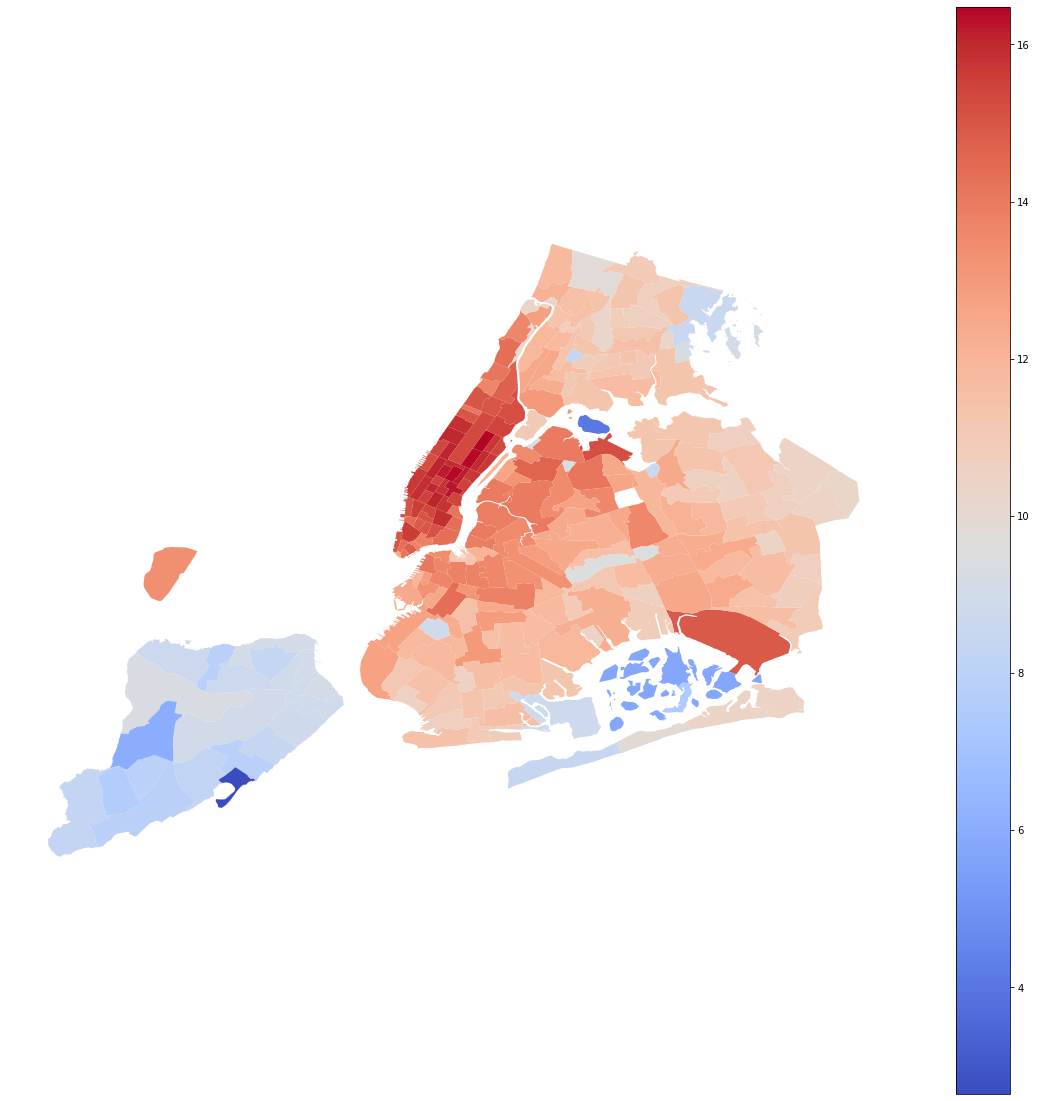

In [8]:
#lot_nums.plot(column='DOID_count', cmap='coolwarm', legend=True,figsize=(20,20),alpha=1)
lot_nums.plot(column='log_amount', cmap='coolwarm', legend=True,figsize=(20,20),alpha=1)
plt.axis('off')
plt.show()